In [83]:
import torch
print(torch.__version__)  # Should show 2.4.1+cu121

2.4.0+cu118


In [84]:
import os
os.environ['R_LIBS_USER'] = '/data4/hussin/R/library'


In [85]:
from rpy2.robjects.vectors import StrVector
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robjects

lib_path = "/data4/hussin/R/library"
robjects.r(f'.libPaths("{lib_path}")')



R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 2: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages



In [86]:
rpackages.isinstalled('mclust')


True

In [87]:
import os
import rpy2.robjects as robjects
from rpy2.robjects.vectors import StrVector
import rpy2.robjects.packages as rpackages

# Set R environment
os.environ['R_HOME'] = '/usr/lib/R'
os.environ['R_LIBS_USER'] = '/data4/hussin/R/library'

lib_path = os.environ['R_LIBS_USER']
robjects.r(f'.libPaths("{lib_path}")')

# Check + install only if needed
if not rpackages.isinstalled('mclust'):
    print("Installing mclust...")
    utils = rpackages.importr('utils')
    utils.install_packages(StrVector(['mclust']), repos='https://mirrors.tuna.tsinghua.edu.cn/CRAN/', lib=lib_path)
else:
    print("✓ mclust already installed")

# Now import it
mclust = rpackages.importr('mclust')
print("✓ Loaded mclust successfully")



R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages



✓ mclust already installed
✓ Loaded mclust successfully


In [88]:
import torch
print(f"PyTorch: {torch.__version__}")
print(f"CUDA: {torch.version.cuda}")
print(f"GPU Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memory: {torch.cuda.get_device_properties(0).total_memory/1e9:.1f}GB")
else:
    print("\n⚠️ Troubleshooting Steps:")
    print("1. Run 'nvidia-smi' to verify GPU detection")
    print("2. Check 'nvcc --version' matches 12.2")
    print("3. Ensure no other processes are using GPU (kill -9 PID)")

PyTorch: 2.4.0+cu118
CUDA: 11.8
GPU Available: True
GPU: NVIDIA H800 PCIe
Memory: 84.9GB


In [89]:
from skmisc.loess import loess

In [90]:
import os
import scanpy as sc
import pandas as pd
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import numpy as np
#from skmisc.loess import loess
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
#import cv2
import squidpy as sq
from MLN2SVG import MLN2SVG 
from config import *
from utils import *
import utils


In [ ]:
ls /data4/hussin/hussain/data/DLPFC

151507/  151509/  151669/  151671/  1516725/  151674/  151676/  results/
151508/  151510/  151670/  151672/  151673/   151675/  HBC/


In [ ]:
ls /data4/hussin/hussain/data/DLPFC/151507

151507_filtered_feature_bc_matrix.h5  151507_results2/  spatial/
151507_results/                       metadata.tsv


In [ ]:
input_dir = '/data4/hussin/hussain/data/DLPFC/151673'
count_file = '151673_filtered_feature_bc_matrix.h5'

myadata = sc.read_visium(path=input_dir, count_file=count_file)
myadata.var_names_make_unique()

/data4/hussin/hussain/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data4/hussin/hussain/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [94]:
myadata

AnnData object with n_obs × n_vars = 3639 × 33538
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [95]:
from skmisc.loess import loess

In [108]:
sc.pp.highly_variable_genes(myadata, n_top_genes=3000, flavor='seurat_v3')

In [ ]:

mln = MLN2SVG(myadata, num_cluster=7, n_epochs=23000, alpha=0.7,lr=1e-4)

In [110]:
adata_processed, exp_matrix_original, exp_matrix_augmented, graph = mln.load_data()

Stage 1: Spatial data reconstruction in progress...
Spatial graph assembled—ready for the next step!


In [ ]:

latent_original, latent_aug, _, _ = mln.train_MLN2SVG(exp_matrix_original, exp_matrix_augmented, graph)

Phase 2: MLN2SVG Models training has benn started...


Training Loss: 20.7175: 100%|██████████| 23000/23000 [01:04<00:00, 356.01it/s]

✓ Model training completed successfully


In [ ]:

adata_result = mln.compute_clusters(adata_processed, latent_original)

Stage 3: Clustering initiated...
fitting ...
  |======================================================================| 100%
✓ Clustering completed successfully


In [113]:
adata_result

AnnData object with n_obs × n_vars = 3639 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'mclust', 'mln2svg_clust'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p', 'pca', 'reconstruct_spatial_expression', 'neighbors'
    obsm: 'spatial', 'MLN2SVG'
    varm: 'PCs'
    layers: 'counts', 'log1p_original', 'log1p_augmented'
    obsp: 'distances', 'connectivities'

In [114]:
adata_result.obs['mln2svg_clust']

AAACAAGTATCTCCCA-1    6
AAACAATCTACTAGCA-1    2
AAACACCAATAACTGC-1    5
AAACAGAGCGACTCCT-1    6
AAACAGCTTTCAGAAG-1    1
                     ..
TTGTTTCACATCCAGG-1    5
TTGTTTCATTAGTCTA-1    5
TTGTTTCCATACAACT-1    1
TTGTTTGTATTACACG-1    5
TTGTTTGTGTAAATTC-1    3
Name: mln2svg_clust, Length: 3639, dtype: category
Categories (7, object): ['1', '2', '3', '4', '5', '6', '7']

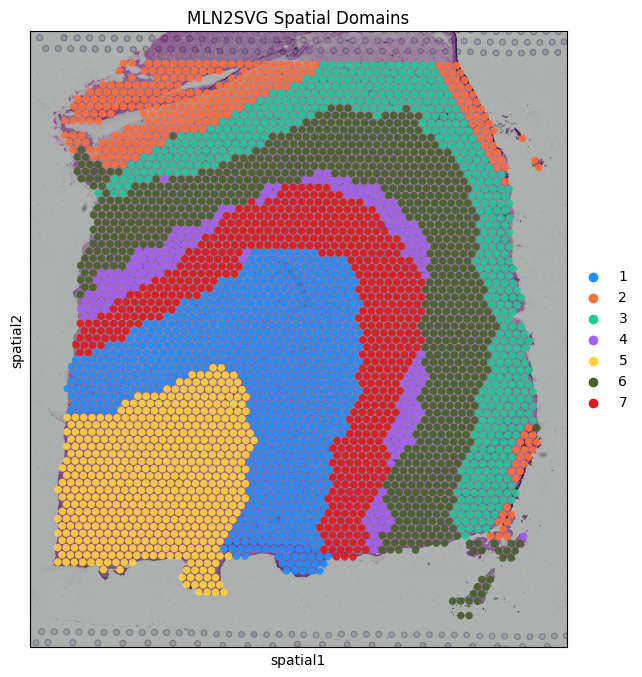

In [115]:
mln.plot_clusters(adata_result)

In [ ]:
GT_meta = pd.read_csv('/data4/hussin/hussain/data/DLPFC/151673/metadata.tsv', sep='\t')
GT_meta['MySpa'] = adata_result.obs["mln2svg_clust"].tolist()
GT_meta = GT_meta[~pd.isnull(GT_meta['layer_guess'])]
ARI = adjusted_rand_score(GT_meta['MySpa'],GT_meta['layer_guess'])
NMI = normalized_mutual_info_score(GT_meta['layer_guess'], GT_meta['MySpa'])

In [117]:
ARI,NMI

(0.6558078376669058, 0.7416462217524721)

In [118]:
adata_processed.obs['Ground Truth'] = GT_meta['layer_guess']
# Ensure your cluster_adata and n_adata observations are aligned and have the same length
adata_processed.obs['mln2svg_clust'] = adata_processed.obs["mln2svg_clust"].tolist()

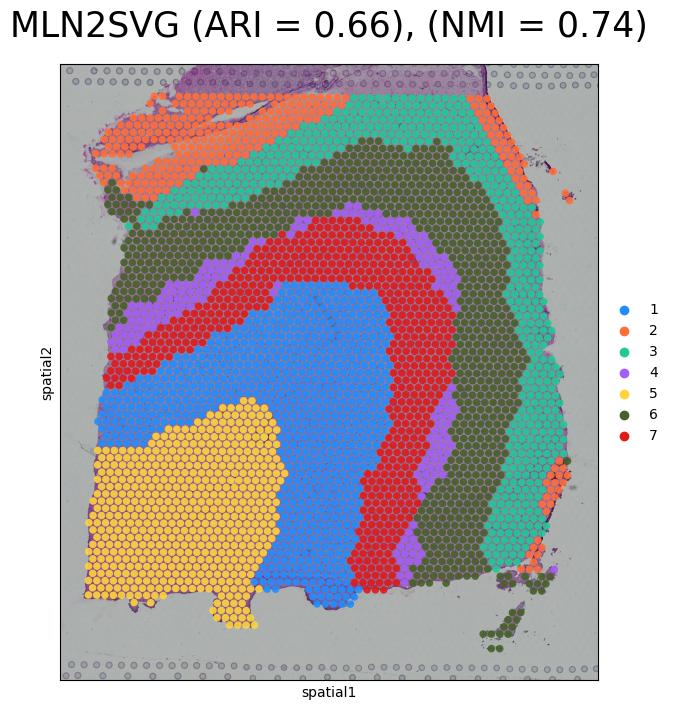

In [119]:
# Plot first
mln.plot_clusters(adata_processed)

# Then get current axis and add title
ax = plt.gca()
ax.set_title(f"MLN2SVG (ARI = {ARI:.2f}), (NMI = {NMI:.2f})", fontsize=25, pad=20)
plt.show()

/data4/hussin/hussain/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


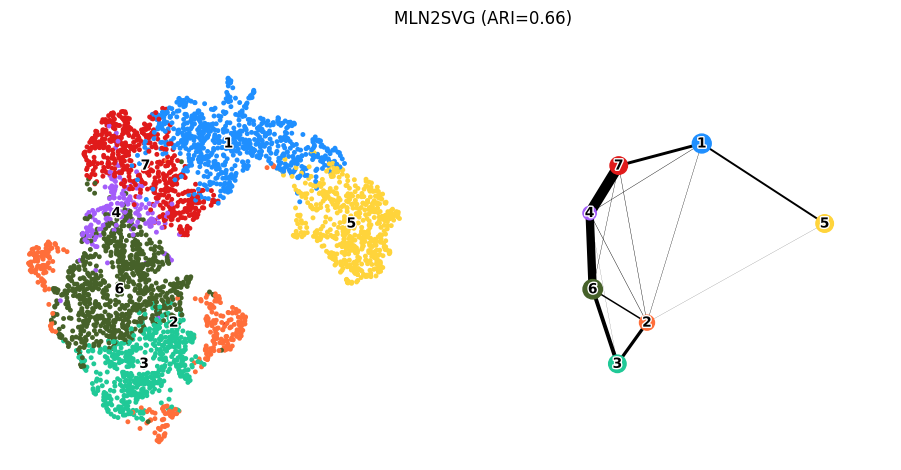

In [120]:

plot_umap_paga(adata_processed, cluster_key='mln2svg_clust', ari_score=ARI)


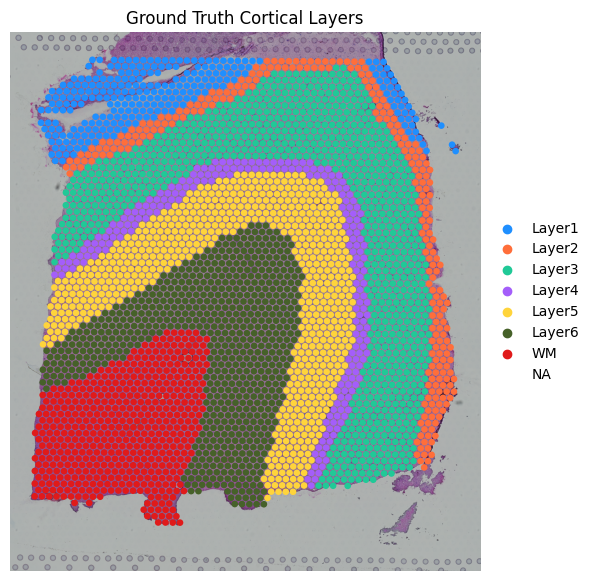

In [121]:
import matplotlib.pyplot as plt
import scanpy as sc

# Set figure size and style
plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams["figure.facecolor"] = "white"

# Plot ground truth spatial distribution
sc.pl.spatial(
    adata_processed,
    color=["Ground Truth"],  # Column name in n_adata.obs
    palette=custom_palette,
    img_key="hires",
    frameon=False,
    title="Ground Truth Cortical Layers",
    size=1.3,              # Optimal spot size
    legend_loc="right margin",
    save="_ground_truth.png"  # Saves high-res version
)

# Add publication-ready

In [122]:
sc.tl.umap(adata_processed)


/data4/hussin/hussain/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data4/hussin/hussain/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


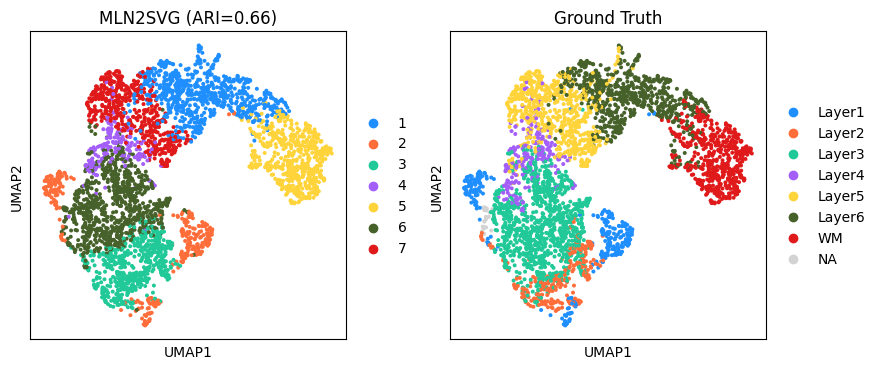

In [123]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata_processed, color=["mln2svg_clust", "Ground Truth"], title=['MLN2SVG (ARI=%.2f)'%ARI, "Ground Truth"])

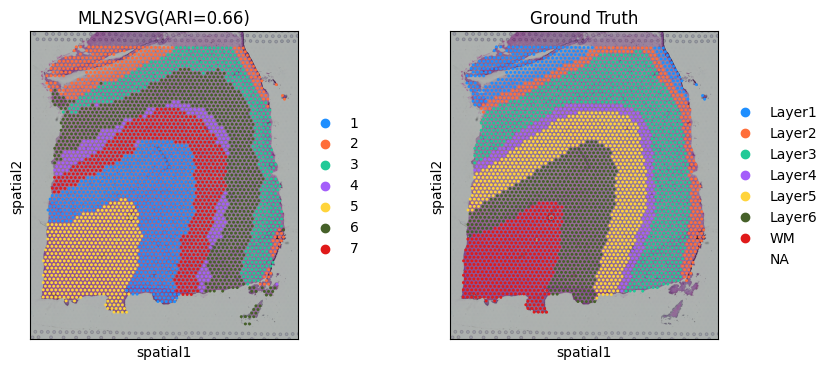

In [124]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.spatial(adata_processed, color=["mln2svg_clust", "Ground Truth"], title=['MLN2SVG(ARI=%.2f)'%ARI, "Ground Truth"])


# **SVG Detection**

In [38]:
adata_processed

AnnData object with n_obs × n_vars = 3639 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'mclust', 'mln2svg_clust', 'Ground Truth'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p', 'pca', 'reconstruct_spatial_expression', 'neighbors', 'mln2svg_clust_colors', 'Ground Truth_colors', 'umap'
    obsm: 'spatial', 'MLN2SVG', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'log1p_original', 'log1p_augmented'
    obsp: 'distances', 'connectivities'

In [42]:
import utils
n_clusters=7
adjacency_matrix = {}

for cluster_id in range(1, n_clusters + 1):
    adjacency_matrix[cluster_id] = utils.find_neighbor_domains(target_cluster=cluster_id, n_adata=adata_processed)


Calculating adjacency matrix using xy coordinates...
Calculating adjacency matrix using xy coordinates...
Calculating adjacency matrix using xy coordinates...
Run 1: radius [138.0036163330078, 1519.8134765625], neighbors [3.2580645161290325, 374.71370967741933]
Calculating adjacency matrix using xy coordinates...
Run 2: radius [138.0036163330078, 828.9085464477539], neighbors [3.2580645161290325, 110.91532258064517]
Calculating adjacency matrix using xy coordinates...
Run 3: radius [138.0036163330078, 483.45608139038086], neighbors [3.2580645161290325, 39.71774193548387]
Calculating adjacency matrix using xy coordinates...
Run 4: radius [138.0036163330078, 310.72984886169434], neighbors [3.2580645161290325, 17.887096774193548]
Calculating adjacency matrix using xy coordinates...
Run 5: radius [224.36673259735107, 310.72984886169434], neighbors [6.721774193548387, 17.887096774193548]
Calculating adjacency matrix using xy coordinates...
Recommended radius = 267.5482907295227, neighbors=1

In [43]:
adjacency_matrix

{1: [6], 2: [7], 3: [5, 2, 1, 4, 7], 4: [3], 5: [4, 7], 6: [1], 7: [2]}

In [44]:
#!pip install networkx

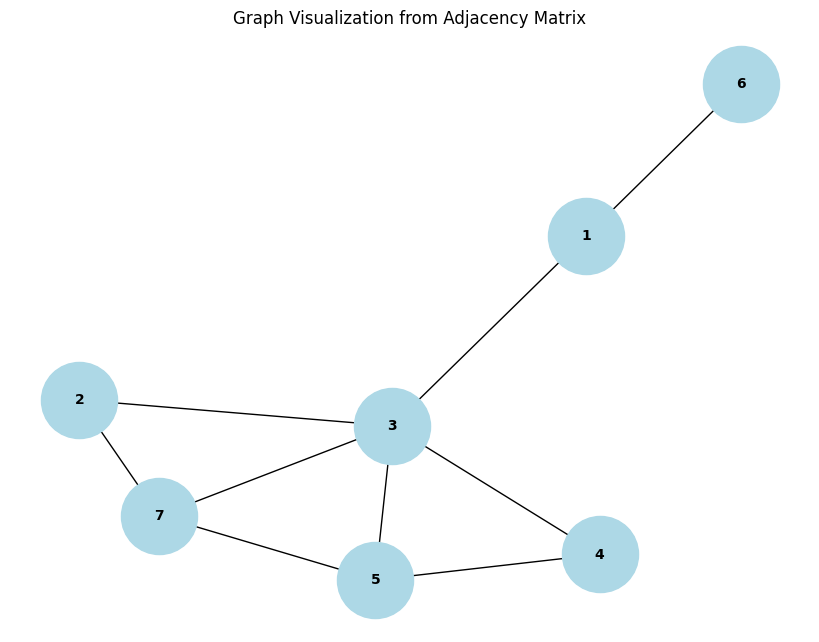

In [45]:
import networkx as nx
import matplotlib.pyplot as plt



# Create an empty graph
G = nx.Graph()

# Add edges to the graph
for node, neighbors in adjacency_matrix.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw(
    G,
    with_labels=True,
    node_color="lightblue",
    font_weight="bold",
    node_size=3000,
    font_size=10,
)
plt.title("Graph Visualization from Adjacency Matrix")
plt.show()


In [46]:
print(type(adjacency_matrix))  # To check the type of the object
print(adjacency_matrix)        # To inspect the content


<class 'dict'>
{1: [6], 2: [7], 3: [5, 2, 1, 4, 7], 4: [3], 5: [4, 7], 6: [1], 7: [2]}


In [47]:
# After calculating adjacency_matrix as shown previously
spatial_markers_1 = utils.find_spatial_markers(
    adata=adata_processed,
    adjacency_matrix=adjacency_matrix,
    cluster_column="mclust",
    min_in_group_fraction=0.8,
    min_in_out_group_ratio=1.0,
    min_fold_change=1.2
)

# spatial_markers will contain the list of filtered DataFrames

SVGs for domain 1: ['SYN2', 'STMN3', 'CYFIP2', 'MOAP1', 'SYP', 'RGS4', 'NSF', 'TAGLN3', 'SYN1', 'LY6H', 'NEFL', 'DIRAS2', 'KIF3C', 'GRIN1', 'ABR', 'NPTN', 'RUNDC3A', 'ATP2B2', 'TMEM130', 'SCN3B', 'PI4KA', 'WSB2', 'RPH3A', 'CPLX1', 'PRKAR1B', 'MAST3', 'CAMK2B', 'NAP1L3', 'CNTN1', 'MAPK1', 'NNAT', 'ATP1B2', 'STMN2', 'CPLX2', 'TUBA4A', 'CTXN1', 'DGKZ', 'CABP1', 'LMO3', 'CHGA', 'NSMF', 'PPP3CB', 'SH3GL2', 'DDN', 'KCNAB2', 'PDZD4', 'NBL1', 'PACSIN1', 'STX1B', 'PSD', 'ATP2B1', 'CAMK2A', 'NCALD', 'PNMA2', 'SEPT3', 'RBFOX1', 'NELL2', 'SYT4', 'NEFM', 'FAM3C', 'TSPYL4', 'SYNPO', 'KRT17', 'CAP2', 'SYT5', 'JPH3', 'JPH4']
Number of significant genes: 67
SVGs for domain 2: ['DIRAS2', 'CLSTN2', 'PRKCG', 'PHYHIPL', 'FAM3C', 'SLC24A2', 'CAMK2D', 'PCP4L1', 'HS3ST2']
Number of significant genes: 9
SVGs for domain 3: ['KRT19', 'SCGB2A2', 'MUC1', 'SCGB1D2']
Number of significant genes: 4
SVGs for domain 4: ['SPARC', 'HLA-A', 'KRT19', 'AGT', 'CD74', 'ADIRF', 'AQP4', 'MT1G', 'VIM', 'CXCL14', 'H2AFJ', 'MYL9']

In [48]:
spatial_markers_1 

[      genes  in_group_fraction  out_group_fraction  in_out_group_ratio  \
 9      SYN2           1.000000            0.978972            1.021480   
 258   STMN3           1.000000            0.995327            1.004695   
 118  CYFIP2           1.000000            0.985981            1.014218   
 92    MOAP1           1.000000            0.983645            1.016627   
 156     SYP           1.000000            0.995327            1.004695   
 ..      ...                ...                 ...                 ...   
 13    KRT17           0.963710            0.838785            1.148935   
 100    CAP2           0.963710            0.922897            1.044222   
 31     SYT5           0.959677            0.841121            1.140950   
 45     JPH3           0.951613            0.834112            1.140869   
 91     JPH4           0.915323            0.794393            1.152230   
 
      in_group_mean_exp  out_group_mean_exp  fold_change     pvals_adj  \
 9             0.730615 

In [49]:

second_order_adjacency = utils.compute_second_order_adjacency(adjacency_matrix)

Multi-level (second-order) adjacency matrix computed
{1: [5], 2: [4, 5], 3: [], 4: [2, 6, 7], 5: [1, 2], 6: [4], 7: [4]}
Result type: <class 'dict'>


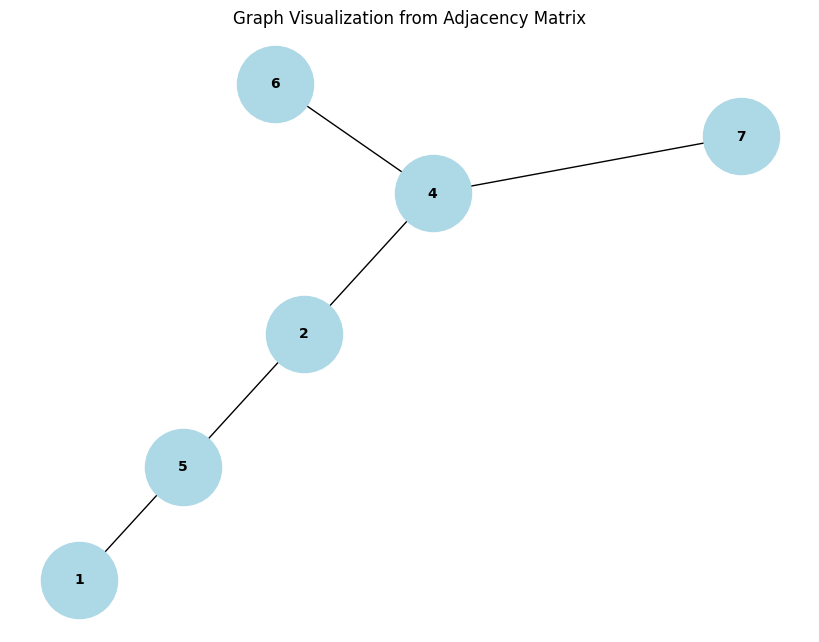

In [51]:
import networkx as nx
import matplotlib.pyplot as plt



# Create an empty graph
G = nx.Graph()

# Add edges to the graph
for node, neighbors in second_order_adjacency .items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw(
    G,
    with_labels=True,
    node_color="lightblue",
    font_weight="bold",
    node_size=3000,
    font_size=10,
)
plt.title("Graph Visualization from Adjacency Matrix")
plt.show()


In [52]:
print("Number of keys in third_adj:", len(second_order_adjacency ))

Number of keys in third_adj: 7


In [54]:
# Compute second-order adjacency


# Find SVGs using second-order relationships
spatial_markers_2 = utils.find_multi_order_svg(
    adata=adata_processed,
    adjacency_dict=second_order_adjacency,
    cluster_column="mclust",
    min_in_group_fraction=0.8,
    min_in_out_group_ratio=1.0,
    min_fold_change=1.2
)

SVGs for domain 1: ['TF', 'CD9', 'SLC12A2', 'OLIG1', 'SLC44A1', 'GSN', 'SOX8', 'CNTN2', 'PLA2G16', 'TSC22D4', 'MOBP', 'APOD', 'EDIL3', 'HIPK2', 'SEMA4D', 'QKI', 'SLAIN1', 'GPRC5B', 'SUN2', 'VWA1', 'PLEKHB1', 'PMP22', 'PREX1', 'AMER2', 'EFHD1', 'SCGB2A2', 'SCRG1', 'SORT1', 'SCARB2', 'HLA-B', 'TMEM258', 'AGT', 'LAMP1', 'KIAA0930', 'EEF1D', 'SPARC', 'CD74', 'H3F3B', 'NENF', 'PTP4A2', 'RNH1', 'HEPACAM', 'SLC48A1', 'CBR1', 'ABCA2', 'AQP4', 'PLLP', 'LHPP', 'PRDX1', 'RNASE1', 'OPALIN', 'TMEM144', 'SELENOP', 'BCAS1', 'PAQR6', 'ENPP2', 'CNDP1', 'CLDN11', 'TTYH2', 'PPP1R14A', 'LINC00844', 'CARNS1', 'CLDND1', 'MOG', 'MAG', 'SEPT4', 'ERMN', 'SPP1', 'RNF130', 'NDRG1', 'CFL2', 'NKX6-2', 'HSPA2', 'DYNC1LI2', 'PAQR8', 'S100A11', 'WNK1', 'IFI27', 'DYNC1I2', 'IFITM3', 'HLA-C', 'LPAR1', 'CERCAM', 'MAL', 'PIP4K2A', 'AIF1L', 'LAMP2', 'TP53INP2', 'FGFR2', 'PADI2', 'ADD3', 'GOLGA7', 'MAP4K4', 'MYRF', 'SPOCK3', 'DDR1', 'ZDHHC9', 'SCGB1D2', 'SHTN1', 'OLIG2', 'RASSF2', 'GPR37', 'UGT8', 'ANLN', 'FGF1', 'FMNL2', 

In [55]:
spatial_markers_2

[        genes  in_group_fraction  out_group_fraction  in_out_group_ratio  \
 3          TF           1.000000            0.991722            1.008347   
 102       CD9           1.000000            0.947020            1.055944   
 148   SLC12A2           1.000000            0.849338            1.177388   
 144     OLIG1           1.000000            0.985099            1.015126   
 131   SLC44A1           1.000000            0.970199            1.030717   
 ..        ...                ...                 ...                 ...   
 171      LIPA           0.931452            0.781457            1.191942   
 61    SLCO1A2           0.931452            0.443709            2.099242   
 99   CDC42EP1           0.923387            0.584437            1.579960   
 79    ADAMTS4           0.919355            0.485099            1.895189   
 64      FOLH1           0.826613            0.173841            4.754992   
 
      in_group_mean_exp  out_group_mean_exp  fold_change     pvals_adj  \


In [56]:
# Display 5 rows from the 1st DataFrame
first_dataframe = spatial_markers_2[3]  # Access the 1st DataFrame
# Display the first 5 rows of the 1st DataFrame in a cleaner format
print("Showing 5 rows from the 1st DataFrame:")
print(first_dataframe.head(5).to_string(index=False))



Showing 5 rows from the 1st DataFrame:
genes  in_group_fraction  out_group_fraction  in_out_group_ratio  in_group_mean_exp  out_group_mean_exp  fold_change    pvals_adj  target_domain neighbors
 MEG3                1.0            0.998155            1.001848           1.148743            0.781305     1.444030 2.866581e-14              5    [1, 2]
PDE2A                1.0            0.976015            1.024575           0.538324            0.336535     1.223590 3.062175e-11              5    [1, 2]
GABRD                1.0            0.990775            1.009311           0.770764            0.518413     1.287047 1.351861e-07              5    [1, 2]
PLCB1                1.0            0.964945            1.036329           0.603907            0.393073     1.234707 1.117908e-07              5    [1, 2]
MEF2C                1.0            0.987085            1.013084           1.037430            0.727762     1.362973 5.134394e-08              5    [1, 2]


In [57]:
print(first_dataframe.head(5))  # Displays rows 1-5
print("Total length:", len(first_dataframe))  # Output: "Total length: 100"

     genes  in_group_fraction  out_group_fraction  in_out_group_ratio  \
250   MEG3                1.0            0.998155            1.001848   
318  PDE2A                1.0            0.976015            1.024575   
492  GABRD                1.0            0.990775            1.009311   
482  PLCB1                1.0            0.964945            1.036329   
460  MEF2C                1.0            0.987085            1.013084   

     in_group_mean_exp  out_group_mean_exp  fold_change     pvals_adj  \
250           1.148743            0.781305     1.444030  2.866581e-14   
318           0.538324            0.336535     1.223590  3.062175e-11   
492           0.770764            0.518413     1.287047  1.351861e-07   
482           0.603907            0.393073     1.234707  1.117908e-07   
460           1.037430            0.727762     1.362973  5.134394e-08   

     target_domain neighbors  
250              5    [1, 2]  
318              5    [1, 2]  
492              5    [1, 2] 

In [58]:
first_dataframe.shape  # Returns (rows, columns)

(104, 10)

In [59]:


# Combine with union of all genes
combined_all = utils.combine_spatial_markers(
    spatial_markers_1,
    spatial_markers_2,
    merge_method='union'
)

# Combine with only consensus genes
combined_consensus = utils.combine_spatial_markers(
    spatial_markers_1, 
    spatial_markers_2,
    merge_method='intersection'
)

Merged results for 7 domains:
- First-order domains: 7
- Second-order domains: 6
- Merge method: union
Merged results for 7 domains:
- First-order domains: 7
- Second-order domains: 6
- Merge method: intersection



# Merged domains

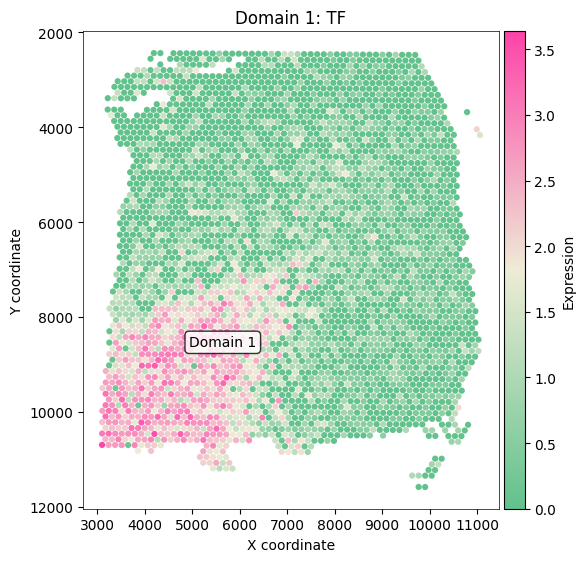

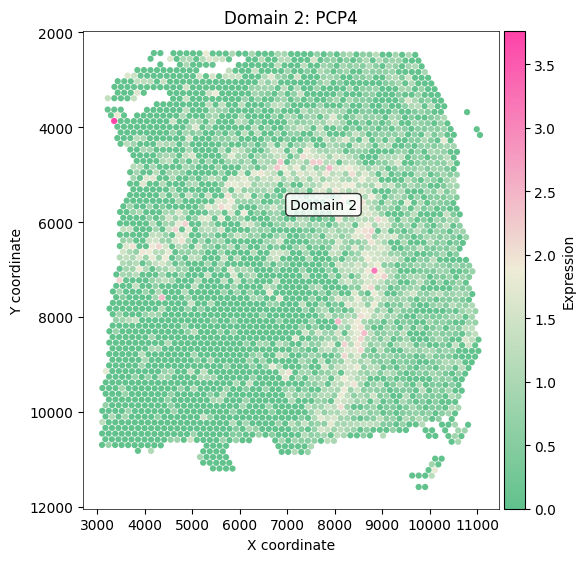

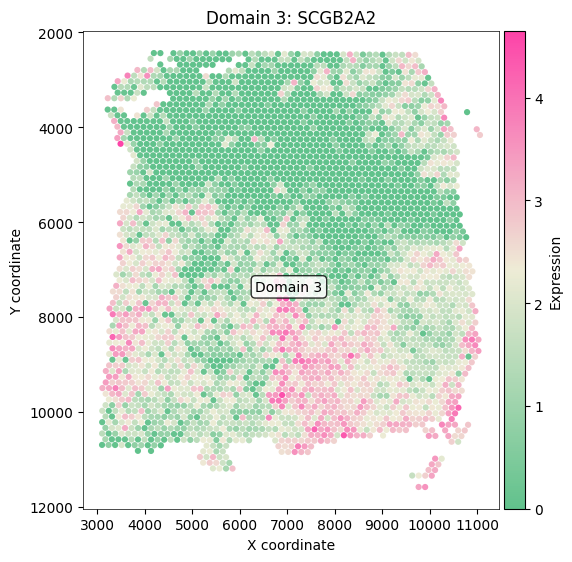

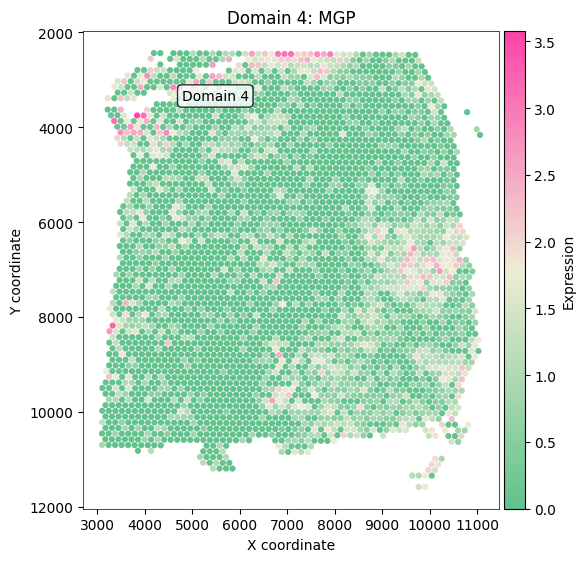

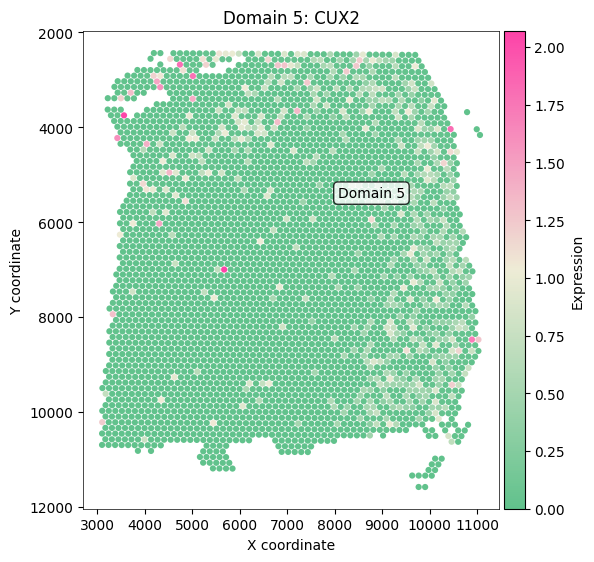

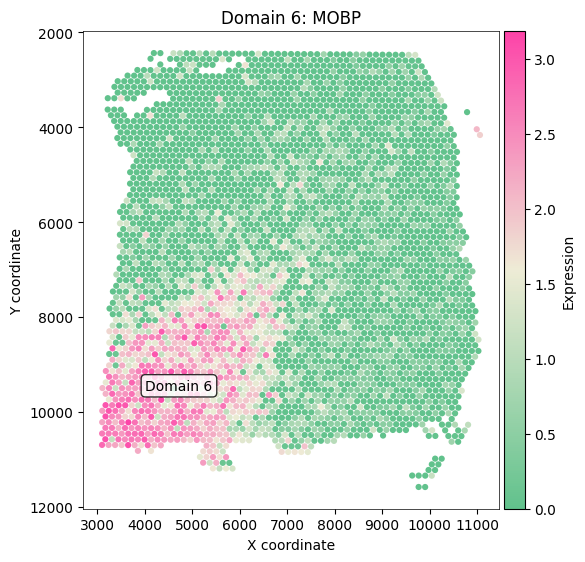

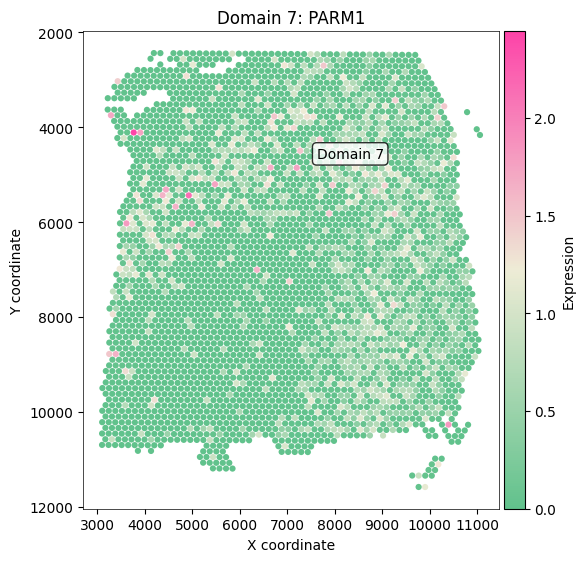

In [68]:


# Example usage
utils.plot_spatial_gene_expression(adata_processed, combined_all)


Saving gene clouds to: /data4/hussin/hussain/tryingGithub/data/DLPFC/151673/151673_results2/GC1
Saved: /data4/hussin/hussain/tryingGithub/data/DLPFC/151673/151673_results2/GC1/GeneCloud_Domain_1.png


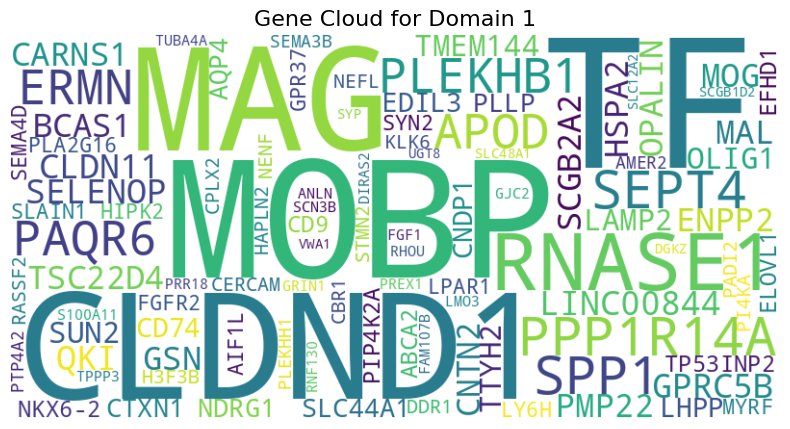

Saved: /data4/hussin/hussain/tryingGithub/data/DLPFC/151673/151673_results2/GC1/GeneCloud_Domain_2.png


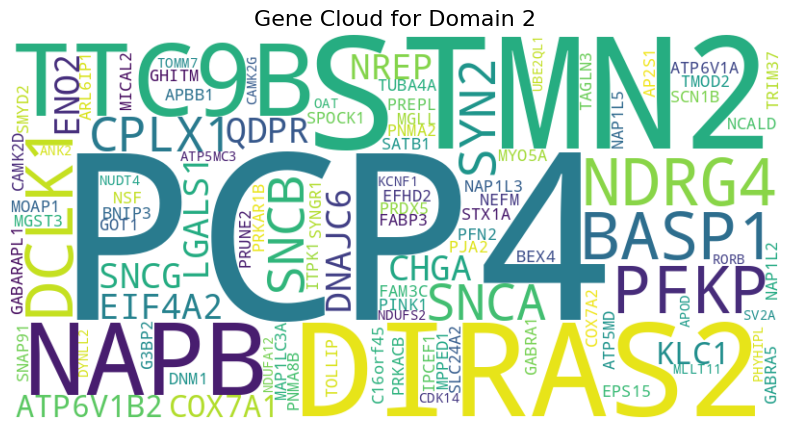

Saved: /data4/hussin/hussain/tryingGithub/data/DLPFC/151673/151673_results2/GC1/GeneCloud_Domain_3.png


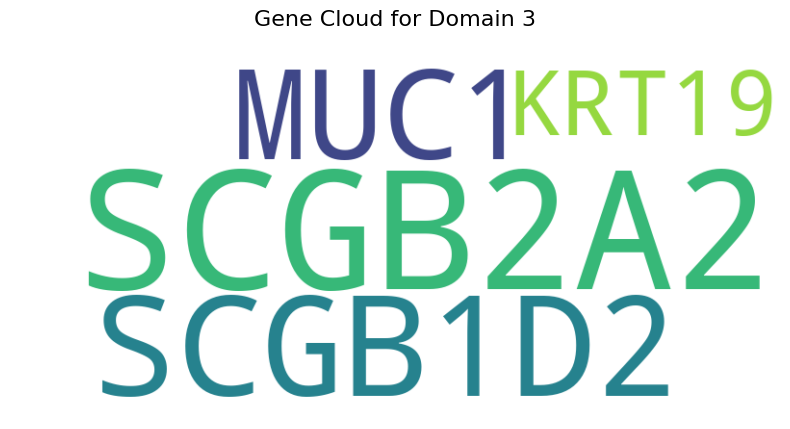

Saved: /data4/hussin/hussain/tryingGithub/data/DLPFC/151673/151673_results2/GC1/GeneCloud_Domain_4.png


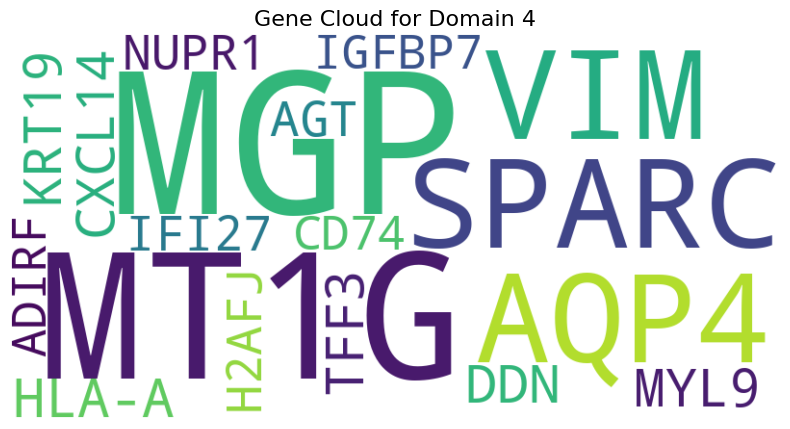

Saved: /data4/hussin/hussain/tryingGithub/data/DLPFC/151673/151673_results2/GC1/GeneCloud_Domain_5.png


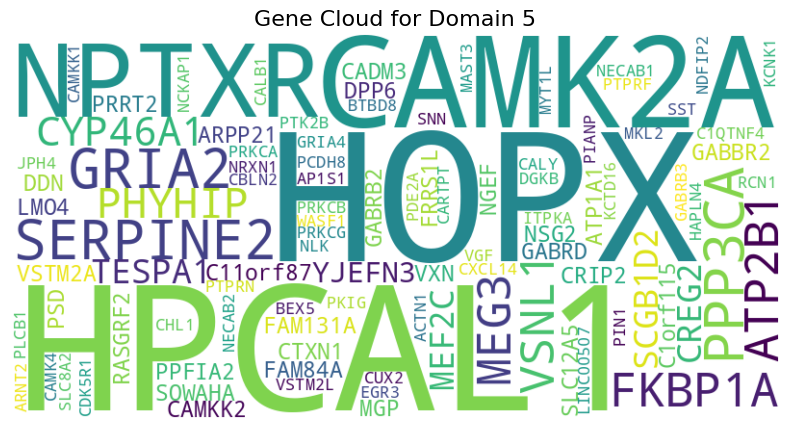

Saved: /data4/hussin/hussain/tryingGithub/data/DLPFC/151673/151673_results2/GC1/GeneCloud_Domain_6.png


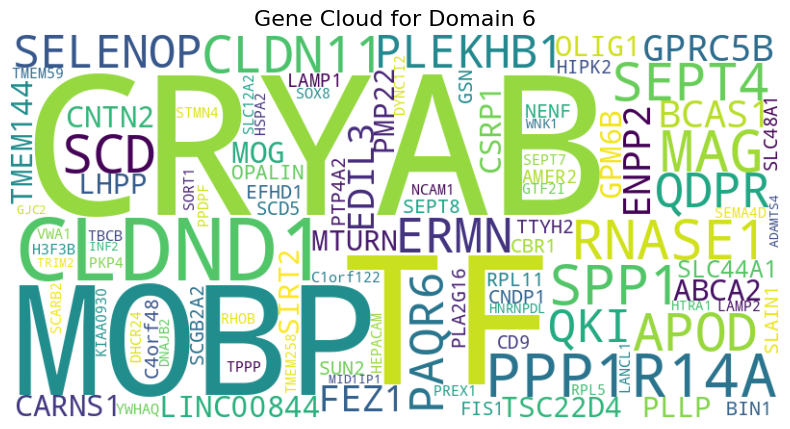

Saved: /data4/hussin/hussain/tryingGithub/data/DLPFC/151673/151673_results2/GC1/GeneCloud_Domain_7.png


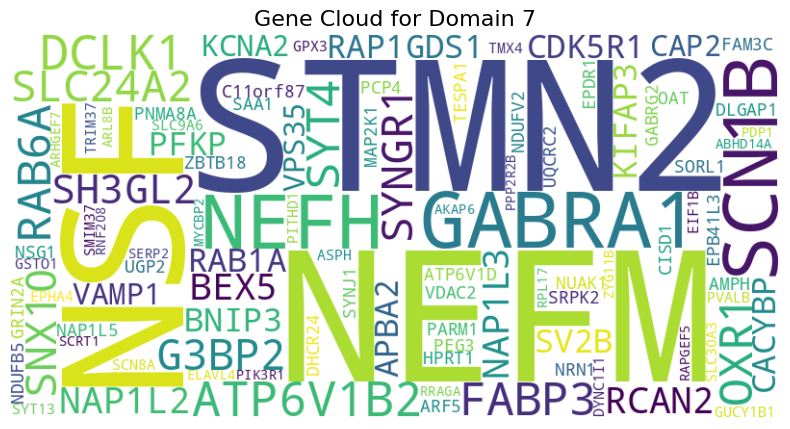

✅ All gene clouds saved and displayed successfully!


In [ ]:


output_dir = "/data4/hussin/hussain/data/DLPFC/151673/151673_results2/GC1"

# Show and save all clouds
utils.generate_gene_clouds(combined_all, output_dir, show=True)


In [74]:
def integration_one_two_adj_genes():
    rst = np.array([])
    for item in spatial_markers_1:
        rst = np.append(rst, item['genes'].values)

    for item in spatial_markers_2:
        rst = np.append(rst, item['genes'].values)

    return rst

In [75]:
integration_genes_array = integration_one_two_adj_genes()

In [ ]:
#!pip install squidpy

In [76]:
import squidpy as sq
from squidpy import gr, im, pl, read, datasets

integration_genes_array = np.unique(integration_genes_array)
len(integration_genes_array)
pd.Index(integration_genes_array)

Index(['A1BG', 'AATK', 'ABCA2', 'ABCA8', 'ABHD12', 'ABHD14A', 'ABHD17B', 'ABR',
       'AC009041.2', 'AC018647.1',
       ...
       'ZBTB18', 'ZCCHC24', 'ZDHHC20', 'ZDHHC9', 'ZEB2', 'ZFAS1', 'ZNF365',
       'ZNF536', 'ZNHIT1', 'ZYG11B'],
      dtype='object', length=917)

In [77]:
len(integration_genes_array)

917

In [78]:
sq.gr.spatial_neighbors(adata_processed, coord_type="generic", delaunay=True)
sq.gr.spatial_autocorr(adata_processed, genes=pd.Index(integration_genes_array), use_raw=False, mode="moran")
adata_processed.uns["moranI"].head(10)

I  pval_norm  var_norm  pval_norm_fdr_bh
MOBP      0.726622        0.0  0.000092               0.0
SCGB2A2   0.724191        0.0  0.000092               0.0
TF        0.683645        0.0  0.000092               0.0
CRYAB     0.677388        0.0  0.000092               0.0
MAG       0.627796        0.0  0.000092               0.0
PPP1R14A  0.616450        0.0  0.000092               0.0
CLDND1    0.589715        0.0  0.000092               0.0
ERMN      0.569632        0.0  0.000092               0.0
CLDN11    0.565487        0.0  0.000092               0.0
SPP1      0.551981        0.0  0.000092               0.0

In [79]:
import squidpy as sq

# Compute spatial neighbors (if not already done)
sq.gr.spatial_neighbors(adata_processed, coord_type="generic", delaunay=True)

# Calculate Moran's I for selected genes
sq.gr.spatial_autocorr(
    adata_processed, 
    genes=pd.Index(integration_genes_array), 
    use_raw=False, 
    mode="moran"  # Mode for Moran's I
)

# View top 10 genes by Moran's I
moran_results = adata_processed.uns["moranI"].head(50)
print("Moran's I Top 10 Genes:")
print(moran_results)

Moran's I Top 10 Genes:
                  I  pval_norm  var_norm  pval_norm_fdr_bh
MOBP       0.726622        0.0  0.000092               0.0
SCGB2A2    0.724191        0.0  0.000092               0.0
TF         0.683645        0.0  0.000092               0.0
CRYAB      0.677388        0.0  0.000092               0.0
MAG        0.627796        0.0  0.000092               0.0
PPP1R14A   0.616450        0.0  0.000092               0.0
CLDND1     0.589715        0.0  0.000092               0.0
ERMN       0.569632        0.0  0.000092               0.0
CLDN11     0.565487        0.0  0.000092               0.0
SPP1       0.551981        0.0  0.000092               0.0
RNASE1     0.539258        0.0  0.000092               0.0
MOG        0.527719        0.0  0.000092               0.0
SCGB1D2    0.523790        0.0  0.000092               0.0
SEPT4      0.508117        0.0  0.000092               0.0
CARNS1     0.501069        0.0  0.000092               0.0
HSPA2      0.488579        0.0  

In [80]:
# Calculate Geary's C for the same genes
sq.gr.spatial_autocorr(
    adata_processed, 
    genes=pd.Index(integration_genes_array), 
    use_raw=False, 
    mode="geary"  # Mode for Geary's C
)

# View top 10 genes by Geary's C
geary_results = adata_processed.uns["gearyC"].head(50)
print("\nGeary's C Top 10 Genes:")
print(geary_results)


Geary's C Top 10 Genes:
                  C      pval_norm  var_norm  pval_norm_fdr_bh
MOBP       0.273170   0.000000e+00  0.000092      0.000000e+00
SCGB2A2    0.275383   0.000000e+00  0.000092      0.000000e+00
TF         0.315814   0.000000e+00  0.000092      0.000000e+00
CRYAB      0.321551   0.000000e+00  0.000092      0.000000e+00
MAG        0.371782   0.000000e+00  0.000092      0.000000e+00
PPP1R14A   0.383536   0.000000e+00  0.000092      0.000000e+00
CLDND1     0.409040   0.000000e+00  0.000092      0.000000e+00
ERMN       0.428067   0.000000e+00  0.000092      0.000000e+00
CLDN11     0.434408   0.000000e+00  0.000092      0.000000e+00
SPP1       0.448096   0.000000e+00  0.000092      0.000000e+00
RNASE1     0.459987   0.000000e+00  0.000092      0.000000e+00
MOG        0.469740   0.000000e+00  0.000092      0.000000e+00
SCGB1D2    0.476584   0.000000e+00  0.000092      0.000000e+00
SEPT4      0.491572   0.000000e+00  0.000092      0.000000e+00
CARNS1     0.499596   0.000000

In [146]:
import pandas as pd

# Get top 50 genes by absolute Moran's I (highest spatial autocorrelation)
top_moran = (
    adata_processed.uns["moranI"]
    .sort_values(by="I", key=abs, ascending=False)
    .head(50)
)

# Get top 50 genes by Geary's C (lowest values indicate stronger autocorrelation)
top_geary = (
    adata_processed.uns["gearyC"]
    .sort_values(by="C", ascending=True)  # Geary's C: Lower = more autocorrelation
    .head(50)
)